In [50]:
#IMPORT
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Load data into dataframe
x_test = pd.read_csv("./csv_files/x_test.csv")
x_test

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,...,motion_54,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63
0,0,-43.0,6.0,-3.0,-6.0,-13.0,-11.0,54.0,-20.0,51.0,...,-21.0,-9.0,-12.0,-3.0,4.0,-2.0,3.0,-6.0,-13.0,-6.0
1,2,-36.0,77.0,18.0,30.0,17.0,4.0,-53.0,-14.0,37.0,...,49.0,-43.0,56.0,-8.0,-2.0,0.0,-5.0,3.0,-44.0,11.0
2,5,-5.0,-2.0,3.0,6.0,-41.0,-42.0,0.0,-4.0,-6.0,...,-1.0,-1.0,34.0,11.0,4.0,2.0,-3.0,3.0,-1.0,-5.0
3,13,6.0,3.0,-1.0,-1.0,10.0,-1.0,0.0,0.0,2.0,...,0.0,2.0,2.0,-1.0,-1.0,1.0,-21.0,-18.0,-2.0,-4.0
4,20,6.0,63.0,9.0,-1.0,-21.0,-1.0,-14.0,-12.0,-20.0,...,108.0,50.0,10.0,-29.0,-12.0,16.0,2.0,5.0,-39.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,5797,3.0,5.0,-4.0,-14.0,1.0,2.0,-42.0,-18.0,-10.0,...,-19.0,5.0,-52.0,-8.0,5.0,-9.0,-8.0,9.0,-4.0,-10.0
1159,5800,0.0,3.0,0.0,-5.0,-10.0,-16.0,-16.0,4.0,-27.0,...,-36.0,-19.0,-5.0,-2.0,-7.0,-3.0,-1.0,-10.0,43.0,1.0
1160,5808,14.0,5.0,2.0,1.0,-12.0,-26.0,-1.0,-6.0,-2.0,...,-1.0,-4.0,-18.0,-1.0,-3.0,-6.0,7.0,27.0,-1.0,-14.0
1161,5809,-16.0,-2.0,-2.0,8.0,14.0,-19.0,-79.0,-13.0,12.0,...,-25.0,4.0,-10.0,-3.0,1.0,6.0,-20.0,0.0,-52.0,-40.0


In [52]:
x_train = pd.read_csv("./csv_files/x_train.csv")
x_train

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,...,motion_54,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63
0,1,-6.0,-1.0,-4.0,-15.0,9.0,13.0,-65.0,-19.0,-25.0,...,98.0,18.0,-2.0,-2.0,-10.0,-4.0,15.0,3.0,60.0,9.0
1,3,0.0,10.0,5.0,21.0,2.0,-8.0,15.0,19.0,-12.0,...,-9.0,-1.0,-27.0,5.0,1.0,2.0,5.0,-8.0,-22.0,7.0
2,4,16.0,5.0,6.0,10.0,-12.0,-27.0,-4.0,-3.0,-13.0,...,0.0,-10.0,2.0,0.0,2.0,-7.0,-18.0,-45.0,-2.0,9.0
3,6,8.0,-16.0,-13.0,2.0,-8.0,-12.0,-54.0,-7.0,-10.0,...,19.0,28.0,8.0,25.0,4.0,3.0,-4.0,36.0,35.0,11.0
4,7,13.0,-1.0,0.0,14.0,-8.0,-10.0,-78.0,-4.0,-9.0,...,-54.0,26.0,-4.0,-4.0,-4.0,-12.0,-6.0,-27.0,-16.0,-98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,5805,-22.0,-3.0,-2.0,-1.0,-6.0,-3.0,-7.0,-18.0,15.0,...,0.0,-10.0,-7.0,4.0,8.0,12.0,-94.0,-93.0,-2.0,15.0
4646,5806,6.0,-3.0,-11.0,-8.0,-10.0,-11.0,-55.0,-21.0,-19.0,...,-23.0,-10.0,15.0,-19.0,-10.0,3.0,5.0,6.0,68.0,11.0
4647,5807,-38.0,2.0,3.0,2.0,-15.0,9.0,0.0,-11.0,67.0,...,-1.0,0.0,3.0,-13.0,-3.0,-5.0,10.0,30.0,5.0,-2.0
4648,5811,22.0,7.0,-4.0,-2.0,1.0,32.0,-2.0,-5.0,-4.0,...,-5.0,-11.0,-28.0,-15.0,-1.0,1.0,9.0,10.0,8.0,28.0


In [53]:
y_test = pd.read_csv("./csv_files/y_test.csv")
y_test

,ID,pose
0,0,0
1,2,0
2,5,1
3,13,1
4,20,0
...,...,...
1158,5797,0
1159,5800,0
1160,5808,1
1161,5809,0


In [54]:
y_train = pd.read_csv("./csv_files/y_train.csv")
y_train

,ID,pose
0,1,0
1,3,0
2,4,1
3,6,0
4,7,0
...,...,...
4645,5805,1
4646,5806,0
4647,5807,1
4648,5811,1


In [55]:
x_test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1158    False
1159    False
1160    False
1161    False
1162    False
Length: 1163, dtype: bool

In [56]:
y_test[ 'pose'].unique()
# y_test.columns


array([0, 1], dtype=int64)

In [57]:
y_train[ 'pose'].unique()

array([0, 1], dtype=int64)

In [58]:
x_test.isnull()

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,...,motion_54,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1159,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
x_train.isnull()

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,...,motion_54,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
y_test.isnull()

,ID,pose
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1158,False,False
1159,False,False
1160,False,False
1161,False,False


In [61]:
y_train.isnull()

,ID,pose
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4645,False,False
4646,False,False
4647,False,False
4648,False,False


In [62]:
x_test.isnull().sum()

ID           0
motion_0     0
motion_1     0
motion_2     0
motion_3     0
            ..
motion_59    0
motion_60    0
motion_61    0
motion_62    0
motion_63    0
Length: 65, dtype: int64

In [63]:
y_test.isnull().sum()

ID      0
pose    0
dtype: int64

In [64]:
x_test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1158    False
1159    False
1160    False
1161    False
1162    False
Length: 1163, dtype: bool

In [65]:
x_train.duplicated().sum()

0

In [66]:
y_test.duplicated().sum()

0

In [67]:
y_test.duplicated().sum()

0

In [68]:
train_data = x_train.copy()
train_data['pose'] = y_train['pose']
train_data

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,...,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63,pose
0,1,-6.0,-1.0,-4.0,-15.0,9.0,13.0,-65.0,-19.0,-25.0,...,18.0,-2.0,-2.0,-10.0,-4.0,15.0,3.0,60.0,9.0,0
1,3,0.0,10.0,5.0,21.0,2.0,-8.0,15.0,19.0,-12.0,...,-1.0,-27.0,5.0,1.0,2.0,5.0,-8.0,-22.0,7.0,0
2,4,16.0,5.0,6.0,10.0,-12.0,-27.0,-4.0,-3.0,-13.0,...,-10.0,2.0,0.0,2.0,-7.0,-18.0,-45.0,-2.0,9.0,1
3,6,8.0,-16.0,-13.0,2.0,-8.0,-12.0,-54.0,-7.0,-10.0,...,28.0,8.0,25.0,4.0,3.0,-4.0,36.0,35.0,11.0,0
4,7,13.0,-1.0,0.0,14.0,-8.0,-10.0,-78.0,-4.0,-9.0,...,26.0,-4.0,-4.0,-4.0,-12.0,-6.0,-27.0,-16.0,-98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,5805,-22.0,-3.0,-2.0,-1.0,-6.0,-3.0,-7.0,-18.0,15.0,...,-10.0,-7.0,4.0,8.0,12.0,-94.0,-93.0,-2.0,15.0,1
4646,5806,6.0,-3.0,-11.0,-8.0,-10.0,-11.0,-55.0,-21.0,-19.0,...,-10.0,15.0,-19.0,-10.0,3.0,5.0,6.0,68.0,11.0,0
4647,5807,-38.0,2.0,3.0,2.0,-15.0,9.0,0.0,-11.0,67.0,...,0.0,3.0,-13.0,-3.0,-5.0,10.0,30.0,5.0,-2.0,1
4648,5811,22.0,7.0,-4.0,-2.0,1.0,32.0,-2.0,-5.0,-4.0,...,-11.0,-28.0,-15.0,-1.0,1.0,9.0,10.0,8.0,28.0,1


In [69]:
train_data.corr()

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,...,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63,pose
ID,1.000000,0.013121,0.000457,-0.019301,-0.028087,-0.004864,0.010296,0.006359,-0.013266,0.011694,...,-0.000055,-0.033308,-0.009212,-0.006901,-0.007439,-0.002124,0.001200,-0.027220,-0.026285,0.015071
motion_0,0.013121,1.000000,0.211825,0.034156,-0.011007,-0.005725,0.042003,0.141925,0.251372,-0.370308,...,0.018113,0.012601,0.029502,0.015035,0.008268,-0.022546,-0.003415,-0.007072,0.014861,0.016355
motion_1,0.000457,0.211825,1.000000,0.371688,0.075426,-0.047240,0.009861,0.101261,0.162220,-0.037811,...,0.031460,-0.013050,0.029026,0.035955,-0.007461,-0.017051,-0.020286,-0.034287,-0.020650,0.004159
motion_2,-0.019301,0.034156,0.371688,1.000000,0.501969,-0.116049,-0.105428,0.064594,0.118102,-0.030974,...,-0.002698,0.008528,-0.034917,-0.005345,-0.005787,0.040446,-0.003482,-0.005406,-0.005036,0.001313
motion_3,-0.028087,-0.011007,0.075426,0.501969,1.000000,-0.028308,-0.110293,0.002942,0.025969,-0.017048,...,-0.012467,0.001504,-0.011130,-0.015355,-0.029126,0.028413,-0.009440,-0.005989,-0.006439,0.005754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
motion_60,-0.002124,-0.022546,-0.017051,0.040446,0.028413,-0.008071,-0.062107,-0.015784,-0.013102,0.000645,...,0.012268,0.008216,-0.077693,-0.120146,-0.028769,1.000000,0.613817,0.119000,0.076972,0.010284
motion_61,0.001200,-0.003415,-0.020286,-0.003482,-0.009440,-0.011614,-0.059104,0.008692,-0.003116,0.013365,...,0.026569,0.064583,-0.024024,-0.140033,-0.126048,0.613817,1.000000,0.259769,0.235505,0.030454
motion_62,-0.027220,-0.007072,-0.034287,-0.005406,-0.005989,-0.007252,-0.054801,-0.022895,-0.016034,0.011988,...,-0.178222,0.128898,0.112483,0.075768,0.021523,0.119000,0.259769,1.000000,0.532124,0.038103
motion_63,-0.026285,0.014861,-0.020650,-0.005036,-0.006439,-0.019020,-0.050621,-0.024718,-0.031125,0.011691,...,-0.291766,0.244604,0.151003,0.136102,0.062224,0.076972,0.235505,0.532124,1.000000,-0.002396


<Axes: >

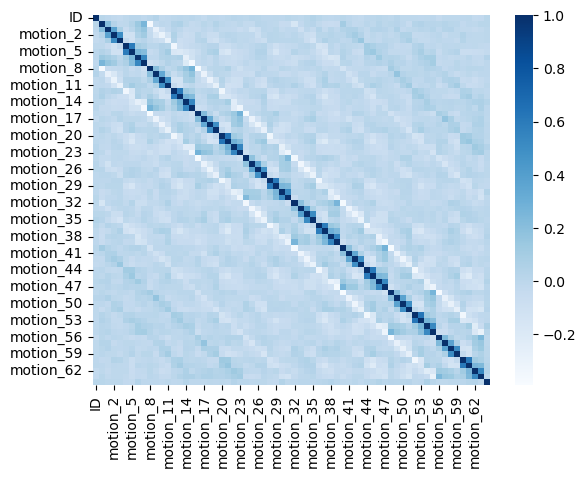

In [70]:
import seaborn as sns
sns.heatmap(train_data.corr(), cmap='Blues')

In [71]:
#training the model
lr_model=LinearRegression()

In [72]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [73]:
X=train_data.drop(['pose'],axis=1)
y=train_data['pose']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.20, random_state=0)

In [87]:
from sklearn.linear_model import LogisticRegression

classify_model = LogisticRegression(max_iter=1000)

classify_model.fit(X_train, y_train)
classify_model


LogisticRegression(max_iter=1000)

In [82]:
preds = classify_model.predict(X_test)
preds

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [83]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)


array([[ 887, 1002],
       [ 426, 1405]], dtype=int64)

In [84]:
#accuracy score
accuracy_score(y_test,preds)


0.6161290322580645